## Packages and definition of parameters

In [1]:
# packages
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import yaml, os, sys, glob
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
pd.set_option("display.max_columns", None)

from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.coordinates import Galactic
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# location of the scripts
sys.path.insert(0, '/fefs/aswg/workspace/juan.jimenez/stereo_analysis/scripts')
import auxiliar as aux
import find_files as find
aux.params() # graphic parameters


# --- other parameters --- #
# name of the source we are studying
source_name = 'Crab'
# ------------------------ #

path_mc     = f'/fefs/aswg/workspace/juan.jimenez/data/dl2/mc/dl2_MC_mean_{source_name}.h5'
path_mc_tot = f'/fefs/aswg/workspace/juan.jimenez/data/dl2/mc/dl2_MC_merged_{source_name}.h5'
path_merged = f'/fefs/aswg/workspace/juan.jimenez/data/dl2/coincident/dl2_merged_{source_name}.h5'
path_mean   = f'/fefs/aswg/workspace/juan.jimenez/data/dl2/coincident/dl2_mean_{source_name}.h5'
path_lst    = f'/fefs/aswg/workspace/juan.jimenez/data/dl2/coincident/dl2_lst_{source_name}.h5'
path_magic  = f'/fefs/aswg/workspace/juan.jimenez/data/dl2/coincident/dl2_melibea_{source_name}.h5'

gammas = [0.0, 0.1, 0.5, 0.7, 0.8, 0.95]

## Defining the dataframes

In [3]:
# reading the main files
df_merged =  pd.read_hdf(path_merged, key='events/parameters')
df_mean   =  pd.read_hdf(path_mean,   key='events/parameters')
df_lst    =  pd.read_hdf(path_lst,    key='events/parameters')
df_magic  =  pd.read_hdf(path_magic,  key='events/parameters')

print(f'The merged dl2 ({sys.getsizeof(df_merged)*1e-9:.1f}Gb) and {int(len(df_merged)/3)} events:')
display(df_merged.head(5))
print(f'The mean-dl2 ({sys.getsizeof(df_mean)*1e-9:.1f}Gb) and {len(df_mean)} events:')
display(df_mean.head(5))
print(f'The lst-dl2 ({sys.getsizeof(df_mean)*1e-9:.1f}Gb) and {len(df_lst)} events:')
display(df_lst.head(5))
print(f'The magic-dl2 ({sys.getsizeof(df_mean)*1e-9:.1f}Gb) and {len(df_magic)} events:')
display(df_magic.head(5))


The merged dl2 (5.0Gb) and 2979565 events:


obs_id_magic  event_id_magic  obs_id_lst  \
obs_id event_id tel_id                                             
2923   2054766  1            5093174            2132      2923.0   
                2            5093174            2132      2923.0   
                3            5093174            2132      2923.0   
       2054879  1            5093174            2134      2923.0   
                2            5093174            2134      2923.0   

                        event_id_lst    intensity         x         y  \
obs_id event_id tel_id                                                  
2923   2054766  1          2054766.0  1539.117331  0.159153 -0.199730   
                2          2054766.0   682.101041  0.219247 -0.123636   
                3          2054766.0   830.125000  0.211807 -0.165825   
       2054879  1          2054879.0   222.561295 -0.455197  0.046522   
                2          2054879.0   185.757812  0.322648  0.192534   

                               r         phi    length  length_uncertainty  \
obs_id event_id tel_id                                                       
2923   2054766  1       0.255385  -51.450648  0.095864            0.003028   
                2       0.251705  -29.419061  0.100258            0.002468   
                3       0.268999  -38.057629  0.094508            0.003121   
       2054879  1       0.457568  174.164535  0.041649            0.003202   
                2       0.375727   30.825800  0.036762            0.001455   

                           width  width_uncertainty        psi  skewness  \
obs_id event_id tel_id                                                     
2923   2054766  1       0.041476           0.001832  39.938156 -0.450708   
                2       0.039357           0.001128  65.294646 -0.720628   
                3       0.030039           0.000740  80.270400  0.379087   
       2054879  1       0.032359           0.001995 -78.978052 -0.425175   
                2       0.028710           0.001415  24.925432  0.411584   

                        kurtosis     slope  intercept  intensity_width_1  \
obs_id event_id tel_id                                                     
2923   2054766  1       2.467139 -7.488149  19.800128                0.0   
                2       2.653032  7.173953  15.740397                0.0   
                3       4.620778 -5.738219  18.871566                0.0   
       2054879  1       2.256291 -2.457408  15.740922                0.0   
                2       2.163804  3.734823  12.596438                0.0   

                        intensity_width_2  pixels_width_1  pixels_width_2  \
obs_id event_id tel_id                                                      
2923   2054766  1                0.000000             0.0        0.000000   
                2                0.000000             0.0        0.000000   
                3                0.000000             0.0        0.000000   
       2054879  1                0.000000             0.0        0.000000   
                2                0.022543             0.0        0.000962   

                        n_pixels  n_islands  pointing_alt  pointing_az  \
obs_id event_id tel_id                                                   
2923   2054766  1             42          1      0.784340     1.508031   
                2             61          1      0.784258     1.508029   
                3             46          2      0.784235     1.508001   
       2054879  1             10          1      0.784341     1.508032   
                2             19          1      0.784258     1.508029   

                           timestamp  time_diff  multiplicity  combo_type  \
obs_id event_id tel_id                                                      
2923   2054766  1       1.605743e+09   0.000020             3           3   
                2       1.605743e+09   0.002003             3           3   
                3       1.605743e+09   0.002003        

The mean-dl2 (0.8Gb) and 2979565 events:


combo_type  multiplicity     timestamp  pointing_alt  \
obs_id event_id                                                         
2923   2054766            3             3  1.605743e+09      0.784278   
       2054879            3             3  1.605743e+09      0.784278   
       2054932            3             3  1.605743e+09      0.784279   
       2055078            3             3  1.605743e+09      0.784279   
       2055274            3             3  1.605743e+09      0.784281   

                 pointing_az  reco_energy   reco_alt    reco_az  gammaness  \
obs_id event_id                                                              
2923   2054766      1.508020     1.043925  45.828519  86.617489   0.486476   
       2054879      1.508021     0.343145  44.369272  86.108064   0.010833   
       2054932      1.508021     0.331730  43.793342  85.654745   0.567683   
       2055078      1.508021     7.284849  44.127087  89.579022   0.022222   
       2055274      1.508022     1.527714  44.070045  87.364394   0.419333   

                 pointing_ra  pointing_dec    reco_ra   reco_dec  \
obs_id event_id                                                    
2923   2054766     83.966939     22.246320  83.000934  22.391517   
       2054879     83.966939     22.246321  84.619623  22.261177   
       2054932     83.966939     22.246322  85.322760  22.382477   
       2055078     83.966940     22.246323  83.950691  19.842418   
       2055274     83.966940     22.246324  84.601973  21.312493   

                     total_id  theta2_on  theta2_off1  theta2_off2  \
obs_id event_id                                                      
2923   2054766   2923.2054766   0.485831     1.457949     0.774216   
       2054879   2923.2054879   0.896131     0.132843     0.558414   
       2054932   2923.2054932   2.583116     0.896444     1.747791   
       2055078   2923.2055078   4.800598     7.061302     7.779579   
       2055274   2923.2055274   1.301577     1.437852     2.142712   

                 theta2_off3  theta2_off4  theta2_off5  pointing_zd    reco_zd  
obs_id event_id                                                                 
2923   2054766      0.288728     1.170674     1.656184   -89.215722 -44.171481  
       2054879      0.939765     0.469956     0.088614   -89.215722 -45.630728  
       2054932      2.590600     1.730641     0.887869   -89.215721 -46.206658  
       2055078      6.647519     4.079161     5.211073   -89.215721 -45.872913  
       2055274      2.073632     0.594867     0.663942   -89.215719 -45.929955

The lst-dl2 (0.8Gb) and 2979565 events:


intensity         x         y         r       phi  \
obs_id event_id                                                        
2923   2054766   1539.117331  0.159153 -0.199730  0.255385 -0.897983   
       2054879    222.561295 -0.455197  0.046522  0.457568  3.039745   
       2054932    493.258595 -0.599963 -0.179310  0.626185 -2.851175   
       2055078   5716.545122 -0.133117  0.249002  0.282351  2.061740   
       2055274   1982.416317  0.194891  0.360309  0.409640  1.074966   

                   length     width       psi  time_gradient  intercept  \
obs_id event_id                                                           
2923   2054766   0.196164  0.084872  0.697052      -7.488149  19.800128   
       2054879   0.085226  0.066215 -1.378427      -2.457408  15.740922   
       2054932   0.161016  0.115821 -1.029677      10.961353  15.071617   
       2055078   0.512571  0.160540 -1.413655      12.083996  26.947308   
       2055274   0.319193  0.215267  0.199006      14.399923  16.464350   

                 pointing_alt  pointing_az   dragon_time   delta_t  \
obs_id event_id                                                      
2923   2054766       0.784340     1.508031  1.605743e+09  0.000020   
       2054879       0.784341     1.508032  1.605743e+09  0.000029   
       2054932       0.784341     1.508032  1.605743e+09  0.000047   
       2055078       0.784342     1.508032  1.605743e+09  0.000082   
       2055274       0.784343     1.508032  1.605743e+09  0.000009   

                 reco_energy  reco_alt   reco_az  gammaness  reco_src_x  \
obs_id event_id                                                           
2923   2054766      1.296785  0.802239  1.512487   0.849113    0.501298   
       2054879      0.147946  0.769320  1.501430   0.050762   -0.420268   
       2054932      0.558524  0.766855  1.489840   0.201653   -0.487265   
       2055078      5.329910  0.775219  1.554315   0.006266   -0.240307   
       2055274      3.378833  0.769079  1.519712   0.006773   -0.426417   

                 reco_src_y  reco_disp_norm      total_id    reco_ra  \
obs_id event_id                                                        
2923   2054766     0.086735        0.446235  2923.2054766  82.850277   
       2054879    -0.132808        0.182700  2923.2054879  84.936292   
       2054932    -0.366841        0.218789  2923.2054932  85.247786   
       2055078     0.925506        0.684944  2923.2055078  83.804180   
       2055274     0.235006        0.633818  2923.2055274  84.682111   

                  reco_dec  pointing_ra  pointing_dec  theta2_on  theta2_off1  \
obs_id event_id                                                                 
2923   2054766   22.407492    83.962253     22.246814   0.680898     1.790172   
       2054879   22.222370    83.962253     22.246817   1.500806     0.417679   
       2054932   22.628811    83.962253     22.246818   2.609381     0.794979   
       2055078   20.295665    83.962252     22.246822   2.975666     4.983686   
       2055274   21.507596    83.962251     22.246827   1.204546     1.075200   

                 theta2_off2  theta2_off3  theta2_off4  theta2_off5  \
obs_id event_id                                                       
2923   2054766      1.008564     0.454574     1.463760     2.017778   
       2054879      1.064476     1.605577     0.853051     0.311970   
       2054932      1.523335     2.430204     1.880296     0.973452   
       2055078      5.455453     4.450168     2.501507     3.506693   
       2055274      1.769295     1.833138     0.508808     0.444969   

                 pointing_zd    reco_zd  
obs_id event_id                          
2923   2054766    -89.215660 -89.197761  
       2054879    -89.215659 -89.230680  
       2054932    -89.215659 -89.233145  
       2055078    -89.215658 -89.224781  
       2055274    -89.215657 -89.230921

The magic-dl2 (0.8Gb) and 2979565 events:


intensity_M1  intensity_M2  src_pos_M1_X  src_pos_M1_Y  \
obs_id  event_id                                                           
5093174 2132        682.093750    830.125000    -95.093643    -67.696632   
        2134        185.757812     60.031250    -95.094864    -67.695946   
        2136        210.335938    165.843750    -95.095299    -67.695694   
        2140       1205.257812   1114.429688    -95.096870    -67.694801   
        2141         89.109375    321.953125    -95.099022    -67.693573   

                  src_pos_M2_X  src_pos_M2_Y     imp_par_1  imp_par_1_Az  \
obs_id  event_id                                                           
5093174 2132        -95.007812    -69.127335     -1.000000           NaN   
        2134        -95.007668    -69.127419     -1.000000           NaN   
        2136        -95.007614    -69.127449  10451.465820   -137.226624   
        2140        -95.007416    -69.127563  33079.812500    -39.287201   
        2141        -95.007156    -69.127724  37034.121094    -96.295853   

                     imp_par_2  imp_par_2_Az   st_dirX   st_dirY  reco_energy  \
obs_id  event_id                                                                
5093174 2132         -1.000000           NaN       NaN       NaN    -0.001000   
        2134         -1.000000           NaN       NaN       NaN    -0.001000   
        2136       4024.333984   -102.823845  0.476395  1.154509     0.298624   
        2140      37042.355469    -28.298143 -1.908767  0.630050     8.639783   
        2141      33820.605469    -85.031845 -0.770281  0.842653     1.631842   

                  gammaness   reco_dec    reco_ra  pointing_alt  pointing_az  \
obs_id  event_id                                                               
5093174 2132       0.067190        NaN        NaN     44.933542    86.399671   
        2134       0.000000        NaN        NaN     44.933578    86.399689   
        2136       0.484714  22.311983  85.326090     44.933591    86.399695   
        2140       0.000000  20.234385  83.950481     44.933637    86.399718   
        2141       0.173393  21.239693  84.563913     44.933700    86.399749   

                        h_max   slope_1   slope_2  pointing_ra  pointing_dec  \
obs_id  event_id                                                               
5093174 2132          -1.0000  0.431198  0.169814    83.983333     22.243889   
        2134          -1.0000  1.135765 -1.296749    83.983333     22.243889   
        2136      886068.6250  0.714785 -1.347897    83.983333     22.243889   
        2140      968358.7500 -0.567660 -0.512080    83.983333     22.243889   
        2141      978703.0625  1.497397 -1.392613    83.983333     22.243889   

                     timestamp   delta_t      magic_id  theta2_on  \
obs_id  event_id                                                    
5093174 2132      1.737312e+09  0.002003  5093174.2132        NaN   
        2134      1.737705e+09  0.004651  5093174.2134        NaN   
        2136      1.737845e+09  0.002138  5093174.2136   2.546927   
        2140      1.738355e+09  0.003429  5093174.2140   3.252068   
        2141      1.739049e+09  0.008976  5093174.2141   1.346854   

                  theta2_off1  theta2_off2  theta2_off3  theta2_off4  \
obs_id  event_id                                                       
5093174 2132              NaN          NaN          NaN          NaN   
        2134              NaN          NaN          NaN          NaN   
        2136         0.867888     1.742949     2.581884     1.670621   
        2140         5.145523     5.786773     4.838509     2.607934   
        2141         1.570236     2.293316     2.180585     0.621737   

                  theta2_off5  pointing_zd  
obs_id  event_id                            
5093174 2132              NaN   -45.066458  
        2134              NaN   -45.066422  
        2136         0.831725   -45.066409  
        2140         3.556091   -45.066363  
   

In [5]:
df_T1 = df_merged.query('tel_id == 1', inplace=False)
df_T2 = df_merged.query('tel_id == 2', inplace=False)
df_T3 = df_merged.query('tel_id == 3', inplace=False)

## Selecting some events and runs to be analysed

In [6]:
gg = 0.9
ee = 2

df_evs = df_merged.query(f'combo_type == 3 and gammaness > {gg} and tel_id == 1 and reco_energy > {ee}')
df_evs2 = df_merged.query(f'combo_type == 3 and gammaness > {gg} and tel_id == 2 and reco_energy > {ee}')
df_evs3 = df_merged.query(f'combo_type == 3 and gammaness > {gg} and tel_id == 3 and reco_energy > {ee}')

obs_counts = df_evs.groupby('obs_id').size().reset_index(name='count')
obs_counts

,obs_id,count
0,2923,124
1,3265,155
2,3266,148
3,3267,133
4,3268,138
5,3382,196
6,3383,111
7,3385,53
8,3631,54
9,3632,93


In [7]:
df = df_evs.query(f'gammaness > {gg} and obs_id == {4125} and reco_energy > {ee}')
index_array = df.index.get_level_values(1).to_numpy()
df

obs_id_magic  event_id_magic  obs_id_lst  \
obs_id event_id tel_id                                             
4125   1812679  1            5095376            3684      4125.0   
       1853473  1            5095376            5280      4125.0   
       1855256  1            5095376            5343      4125.0   
       1941642  1            5095376            8662      4125.0   
       1981710  1            5095376           10220      4125.0   
...                              ...             ...         ...   
       7183745  1            5095376          209638      4125.0   
       7189361  1            5095376          209858      4125.0   
       7192129  1            5095376          209987      4125.0   
       7209504  1            5095376          210649      4125.0   
       7232460  1            5095376          211482      4125.0   

                        event_id_lst    intensity         x         y  \
obs_id event_id tel_id                                                  
4125   1812679  1          1812679.0   778.284462  0.194544 -0.333389   
       1853473  1          1853473.0  1331.005148 -0.006290 -0.039726   
       1855256  1          1855256.0  4317.474043 -0.074445 -0.592877   
       1941642  1          1941642.0  1715.450293  0.034365 -0.040457   
       1981710  1          1981710.0   823.922331 -0.124859 -0.144278   
...                              ...          ...       ...       ...   
       7183745  1          7183745.0  1570.486341  0.507502  0.380637   
       7189361  1          7189361.0  9615.932411  0.377883 -0.380449   
       7192129  1          7192129.0  1038.806866 -0.383832 -0.464396   
       7209504  1          7209504.0  1159.051743  0.275614 -0.083469   
       7232460  1          7232460.0  3619.893916  0.157341  0.483765   

                               r         phi    length  length_uncertainty  \
obs_id event_id tel_id                                                       
4125   1812679  1       0.385999  -59.734960  0.169275            0.006841   
       1853473  1       0.040221  -98.997064  0.173149            0.006289   
       1855256  1       0.597533  -97.156901  0.192615            0.004490   
       1941642  1       0.053082  -49.654826  0.192680            0.006503   
       1981710  1       0.190803 -130.873142  0.177692            0.007013   
...                          ...         ...       ...                 ...   
       7183745  1       0.634383   36.870674  0.194886            0.005699   
       7189361  1       0.536225  -45.193881  0.102740            0.001747   
       7192129  1       0.602487 -129.574397  0.169170            0.005979   
       7209504  1       0.287976  -16.848858  0.217352            0.007829   
       7232460  1       0.508709   71.983319  0.191039            0.004721   

                           width  width_uncertainty        psi  skewness  \
obs_id event_id tel_id                                                     
4125   1812679  1       0.036566           0.002040   0.795160  0.329057   
       1853473  1       0.033357           0.001611   9.935932 -0.460464   
       1855256  1       0.042887           0.001072  27.030896  0.659255   
       1941642  1       0.041478           0.001561  10.255179  0.390421   
       1981710  1       0.034650           0.001819  57.267466  0.311818   
...                          ...                ...        ...       ...   
       7183745  1       0.039360           0.001525  13.798161 -0.187373   
       7189361  1       0.032588           0.000738   4.795174 -0.821633   
       7192129  1       0.029652           0.001423  33.567754 -0.136070   
       7209504  1       0.035354           0.001742  21.245926  0.532958   
       7232460  1       0.037357           0.001121  62.966189  0.752182   

                        kurtosis      slope  intercept  intensity_width_1  \
obs_id event_id tel_id                                                      
4125   1812679  1       2.21424

In [8]:
NL, NM = 53000, 16000

for mi, mr, i, e in zip( df['event_id_magic'],  df['obs_id_magic'], index_array, df['reco_energy']):
    if i%NL < 15000:
        print(f'{i%NL}  \t{mr}-RUN MAGIC \t{i//NL}-srunLST \t{mi//NM}-srunM, \tE={e:.2f}, \t{i}-ev LST')

10679  	5095376-RUN MAGIC 	34-srunLST 	0-srunM, 	E=2.06, 	1812679-ev LST
256  	5095376-RUN MAGIC 	35-srunLST 	0-srunM, 	E=9.24, 	1855256-ev LST
12702  	5095376-RUN MAGIC 	39-srunLST 	0-srunM, 	E=2.07, 	2079702-ev LST
1908  	5095376-RUN MAGIC 	45-srunLST 	1-srunM, 	E=8.65, 	2386908-ev LST
651  	5095376-RUN MAGIC 	47-srunLST 	1-srunM, 	E=7.73, 	2491651-ev LST
499  	5095376-RUN MAGIC 	48-srunLST 	1-srunM, 	E=2.71, 	2544499-ev LST
3525  	5095376-RUN MAGIC 	50-srunLST 	2-srunM, 	E=14.98, 	2653525-ev LST
8073  	5095376-RUN MAGIC 	51-srunLST 	2-srunM, 	E=5.01, 	2711073-ev LST
11379  	5095376-RUN MAGIC 	51-srunLST 	2-srunM, 	E=33.40, 	2714379-ev LST
11635  	5095376-RUN MAGIC 	55-srunLST 	2-srunM, 	E=7.50, 	2926635-ev LST
4294  	5095376-RUN MAGIC 	58-srunLST 	3-srunM, 	E=2.48, 	3078294-ev LST
10350  	5095376-RUN MAGIC 	58-srunLST 	3-srunM, 	E=27.48, 	3084350-ev LST
11129  	5095376-RUN MAGIC 	59-srunLST 	3-srunM, 	E=2.96, 	3138129-ev LST
3835  	5095376-RUN MAGIC 	61-srunLST 	3-srunM, 	E=4.86, 	3

In [14]:
df_T1

obs_id_magic  event_id_magic  obs_id_lst  \
obs_id event_id tel_id                                             
2923   2054766  1            5093174            2132      2923.0   
       2054879  1            5093174            2134      2923.0   
       2054932  1            5093174            2136      2923.0   
       2055078  1            5093174            2140      2923.0   
       2055274  1            5093174            2141      2923.0   
...                              ...             ...         ...   
7282   2109703  1            5101254          138739      7282.0   
       2109706  1            5101254          138740      7282.0   
       2109758  1            5101254          138745      7282.0   
       2109761  1            5101254          138746      7282.0   
       2109764  1            5101254          138747      7282.0   

                        event_id_lst     intensity         x         y  \
obs_id event_id tel_id                                                   
2923   2054766  1          2054766.0   1539.117331  0.159153 -0.199730   
       2054879  1          2054879.0    222.561295 -0.455197  0.046522   
       2054932  1          2054932.0    493.258595 -0.599963 -0.179310   
       2055078  1          2055078.0   5716.545122 -0.133117  0.249002   
       2055274  1          2055274.0   1982.416317  0.194891  0.360309   
...                              ...           ...       ...       ...   
7282   2109703  1          2109703.0    161.578280  0.129926  0.225766   
       2109706  1          2109706.0   1411.014652  0.508547  0.383668   
       2109758  1          2109758.0    573.583883  0.528073 -0.410151   
       2109761  1          2109761.0  11563.316135  0.751728 -0.009624   
       2109764  1          2109764.0    157.742496  0.594928  0.060797   

                               r         phi    length  length_uncertainty  \
obs_id event_id tel_id                                                       
2923   2054766  1       0.255385  -51.450648  0.095864            0.003028   
       2054879  1       0.457568  174.164535  0.041649            0.003202   
       2054932  1       0.626185 -163.360272  0.078687            0.003949   
       2055078  1       0.282351  118.128978  0.250496            0.005006   
       2055274  1       0.409640   61.591016  0.155989            0.004293   
...                          ...         ...       ...                 ...   
7282   2109703  1       0.260483   60.080090  0.029154            0.002615   
       2109706  1       0.637041   37.032332  0.247428            0.009812   
       2109758  1       0.668644  -37.836256  0.268527            0.009868   
       2109761  1       0.751789   -0.733504  0.126975            0.001769   
       2109764  1       0.598026    5.834881  0.035462            0.003097   

                           width  width_uncertainty        psi  skewness  \
obs_id event_id tel_id                                                     
2923   2054766  1       0.041476           0.001832  39.938156 -0.450708   
       2054879  1       0.032359           0.001995 -78.978052 -0.425175   
       2054932  1       0.056601           0.004111 -58.996127 -0.318477   
       2055078  1       0.078455           0.001613 -80.996464  0.739693   
       2055274  1       0.105200           0.004064  11.402230  0.416456   
...                          ...                ...        ...       ...   
7282   2109703  1       0.025592           0.002721  25.285712  0.009105   
       2109706  1       0.141649           0.004996  25.887281 -0.866554   
       2109758  1       0.053774           0.003726 -48.286286 -0.605877   
       2109761  1       0.047881           0.000762 -77.635188  0.803770   
       2109764  1       0.027762           0.002495  22.157520  0.082280   

                        kurtosis      slope  intercept  intensity_width_1  \
obs_id event_id tel_id                                                      
2923   2054766  1 

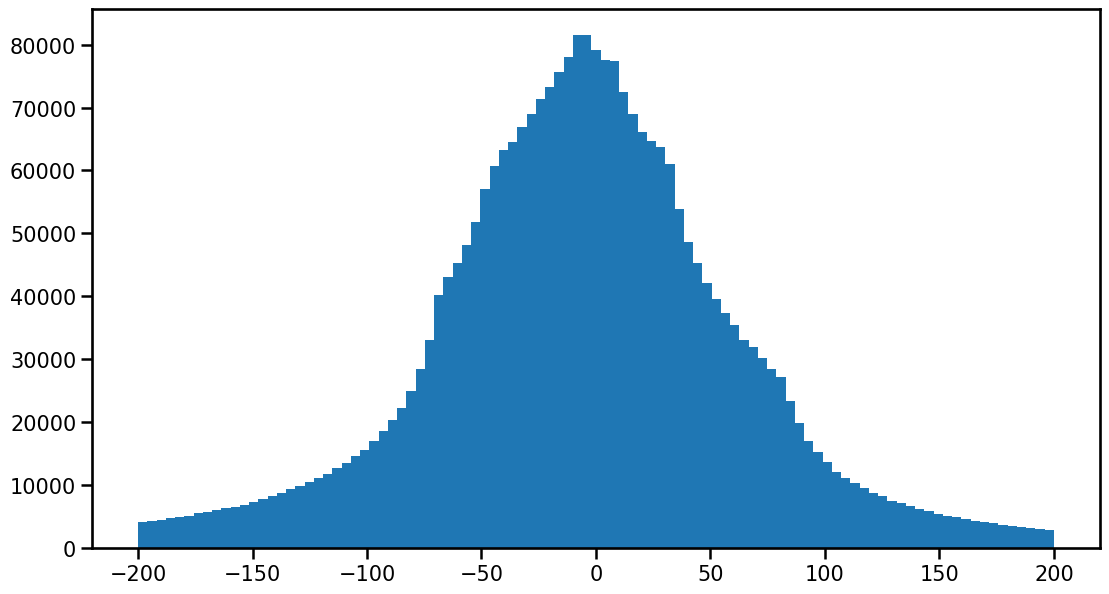

In [24]:
plt.hist(df_T1['core_y'], bins=np.linspace(-200, 200, 100));

In [45]:
energy    = 3
gammaness = 0.7 
intensity = 400
camera_dist = 0.3
dist_impact = 100

mask_eg   = f'reco_energy > {energy} and gammaness > {gammaness} and intensity > {intensity}'
mask_cent = f'and x > -{camera_dist} and x < {camera_dist} and y > -{camera_dist} and y < {camera_dist}' 
mask_impact = f'and core_x > -{dist_impact} and core_x < {dist_impact} and core_y > -{dist_impact} and core_y< {dist_impact}'

df_evs = df_T1.reset_index().query(mask_eg + mask_cent + mask_impact)

df_evs

,obs_id,event_id,tel_id,obs_id_magic,event_id_magic,obs_id_lst,event_id_lst,intensity,x,y,r,phi,length,length_uncertainty,width,width_uncertainty,psi,skewness,kurtosis,slope,intercept,intensity_width_1,intensity_width_2,pixels_width_1,pixels_width_2,n_pixels,n_islands,pointing_alt,pointing_az,timestamp,time_diff,multiplicity,combo_type,alt,alt_uncert,az,az_uncert,core_x,core_y,impact,h_max,reco_energy,reco_energy_var,reco_disp,reco_disp_var,reco_alt,reco_az,disp_diff_sum,disp_diff_mean,gammaness,gammaness_var,total_id,magic_id,pointing_zd,reco_zd
1034,2923,2197605,1,5093174,4824,2923.0,2197605.0,13462.749142,-0.266966,-0.111233,0.289212,-157.380704,0.106169,0.001378,0.034110,0.000488,42.364213,-0.682280,3.165145,-0.577121,22.449522,0.0,0.0,0.0,0.0,46,2,0.785108,1.508396,1.605743e+09,0.000039,3,3,44.896101,0.326792,86.626072,0.326792,48.152416,-30.229897,93.007359,10317.440511,4.030478,0.005388,0.716077,0.007238,44.965630,86.784995,1.677182,0.559061,0.925238,0.069173,2923.2197605,5093174.4824,-89.214892,-45.034370
27620,2923,5685032,1,5093174,74545,2923.0,5685032.0,735.685606,-0.011999,-0.264511,0.264783,-92.597405,0.166184,0.007167,0.034191,0.001812,-54.673601,0.387377,2.307088,-26.522858,27.593459,0.0,0.0,0.0,0.0,46,1,0.804625,1.517976,1.605743e+09,0.000283,3,3,45.893265,0.860373,86.764069,0.860373,-9.420895,-13.138302,65.517961,8261.234786,3.619981,0.006355,2.358564,0.080262,47.384128,83.331332,4.595701,1.531900,0.822000,0.146316,2923.5685032,5093174.74545,-89.195375,-42.615872
88230,2923,13461327,1,5093174,224552,2923.0,13461327.0,36186.983231,-0.032068,-0.058305,0.066542,-118.810972,0.111376,0.000852,0.038907,0.000380,-45.502022,-0.580409,3.021508,0.215387,24.606935,0.0,0.0,0.0,0.0,52,1,0.847980,1.539837,1.605744e+09,0.000097,3,3,48.987514,0.720417,87.389213,0.720417,-64.184764,-36.963361,104.423459,9323.951519,9.972312,0.006681,0.737562,0.003519,49.032840,87.241755,0.673581,0.224527,0.873833,0.110249,2923.13461327,5093174.224552,-89.152020,-40.967160
123618,3265,222006,1,5093711,2205,3265.0,222006.0,823.233610,-0.176441,-0.101602,0.203603,-150.064829,0.193961,0.007781,0.032929,0.001640,-45.301436,0.271009,2.265656,-31.222910,26.393275,0.0,0.0,0.0,0.0,49,1,0.699150,1.467533,1.608068e+09,0.000032,3,3,40.581402,0.981199,82.649045,0.981199,-45.152701,-16.685392,75.801027,11074.361942,4.750823,0.008539,2.295046,0.018818,41.286210,81.635764,3.944357,1.314786,0.895833,0.093316,3265.222006,5093711.2205,-89.300850,-48.713790
153127,3265,1916251,1,5093711,68265,3265.0,1916251.0,1029.359133,-0.087789,-0.167199,0.188845,-117.702106,0.162826,0.005748,0.033694,0.001733,-63.342492,0.308512,2.225566,-31.433230,25.756771,0.0,0.0,0.0,0.0,45,1,0.718150,1.476394,1.608068e+09,0.000050,3,3,41.412641,0.838233,82.971870,0.838233,-96.362322,-30.772974,119.561157,9817.839735,8.564343,0.016385,2.246948,0.023909,41.932696,81.431380,2.957122,0.985707,0.900500,0.089600,3265.1916251,5093711.68265,-89.281850,-48.067304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930607,7282,127491,1,5101254,18264,7282.0,127491.0,48186.643158,-0.102715,-0.107180,0.148452,-133.781303,0.066862,0.000468,0.054678,0.000433,50.554556,0.382622,3.257098,-8.908724,13.159394,0.0,0.0,0.0,0.0,49,1,0.711270,4.798968,1.646523e+09,0.000042,3,3,40.353790,0.022795,274.362564,0.022795,25.881258,31.236569,46.311591,9594.926734,40.635664,0.006562,0.297621,0.004382,40.351981,274.371249,1.232905,0.410968,0.702500,0.208994,7282.127491,5101254.18264,-89.288730,-49.648019
2950480,7282,941144,1,5101254,66433,7282.0,941144.0,18240.597843,-0.081424,0.123145,0.147630,123.472883,0.106192,0.001049,0.034512,0.000440,86.683573,0.583706,2.700286,-5.609376,12.842841,0.0,0.0,0.0,0.0,45,1,0.691826,4.808183,1.646523e+09,0.000397,3,3,39.429469,0.036168,274.967130,0.036168,92.058907,55.917529,101.872231,9334.177383,8.800903,0.033609

In [41]:
run_m      = df_evs['obs_id_magic'].to_numpy()
run_lst    = df_evs['obs_id'].to_numpy()
event_id_m = df_evs['obs_id_magic'].to_numpy()
event_id_l = df_evs['obs_id'].to_numpy()

array([2923, 2923, 2923, 3265, 3265, 3265, 3265, 3266, 3266, 3266, 3266,
       3267, 3267, 3267, 3267, 3268, 3268, 3268, 3382, 3382, 3382, 3382,
       3382, 3382, 3382, 3382, 3382, 3382, 3382, 3382, 3382, 3382, 3383,
       3383, 3383, 3385, 3385, 3631, 3631, 3632, 3632, 3632, 3632, 3632,
       3634, 3634, 3634, 3634, 3635, 3635, 3635, 3635, 3635, 3635, 3635,
       3635, 3635, 3636, 3636, 3636, 3636, 3955, 3955, 3955, 3956, 3956,
       3956, 3956, 3956, 3956, 4011, 4011, 4011, 4011, 4011, 4011, 4011,
       4011, 4012, 4012, 4012, 4012, 4012, 4012, 4012, 4012, 4013, 4013,
       4013, 4013, 4013, 4013, 4013, 4013, 4013, 4013, 4013, 4013, 4013,
       4013, 4013, 4013, 4014, 4014, 4014, 4014, 4014, 4014, 4014, 4014,
       4014, 4014, 4014, 4014, 4014, 4014, 4125, 4125, 4125, 4125, 4125,
       4125, 4125, 4125, 4126, 4126, 4126, 4126, 4126, 4126, 4126, 4126,
       4126, 4126, 4126, 4126, 4126, 4126, 4126, 4126, 4126, 7198, 7198,
       7198, 7198, 7198, 7198, 7198, 7200, 7200, 72

In [9]:
gg = 0.5
ee = 10
ii = 500
inte = 100
dist = 500
leng = 0.3

mask_center = f'and x > -0.2 and x < 0.2 and y > -0.2 and y< 0.2 and length > {leng}'
mask_centertel = f'and core_x > -{dist} and core_x < {dist} and core_y > -{dist} and core_y< {dist}'
mask_inte = f'and intensity > {inte}'
df_evs = df_merged.query(f'combo_type == 3 and gammaness > {gg} and tel_id == 1 and reco_energy > {ee} and impact <{ii}'+mask_center+mask_centertel+mask_inte)
df_evs2 = df_merged.query(f'combo_type == 3 and gammaness > {gg} and tel_id == 2 and reco_energy > {ee} and impact <{ii}'+mask_center+mask_centertel+mask_inte)
df_evs3 = df_merged.query(f'combo_type == 3 and gammaness > {gg} and tel_id == 3 and reco_energy > {ee} and impact <{ii}'+mask_center+mask_centertel+mask_inte)

obs_counts = df_evs.groupby('obs_id').size().reset_index(name='count')
obs_counts

,obs_id,count
0,3382,1
1,3634,1
2,7200,1
3,7227,5
4,7231,1
5,7233,1
6,7238,1
7,7255,1
8,7256,1
9,7277,2


In [10]:
df = df_evs.query(f'gammaness > {gg} and obs_id == {7233} and reco_energy > {ee} and impact <{ii}'+mask_center+mask_centertel+mask_inte)
index_array = df.index.get_level_values(1).to_numpy()
df

,,,obs_id_magic,event_id_magic,obs_id_lst,event_id_lst,intensity,x,y,r,phi,length,length_uncertainty,width,width_uncertainty,psi,skewness,kurtosis,slope,intercept,intensity_width_1,intensity_width_2,pixels_width_1,pixels_width_2,n_pixels,n_islands,pointing_alt,pointing_az,timestamp,time_diff,multiplicity,combo_type,alt,alt_uncert,az,az_uncert,core_x,core_y,impact,h_max,reco_energy,reco_energy_var,reco_disp,reco_disp_var,reco_alt,reco_az,disp_diff_sum,disp_diff_mean,gammaness,gammaness_var,total_id,magic_id,pointing_zd,reco_zd
obs_id,event_id,tel_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3382,2247118,1,5094024,328457,3382.0,2247118.0,16138.089687,0.142181,-0.192924,0.239656,-53.610477,0.30886,0.003368,0.056005,0.00075,28.711248,0.585745,2.833584,11.276175,23.488058,0.0,0.0,0.0,0.0,182,1,0.908104,4.711411,1.608694e+09,0.000144,3,3,50.385916,0.315072,267.707676,0.315072,108.368367,-196.727008,238.454203,7882.936208,10.693167,0.009294,1.981639,0.010257,50.563882,267.823974,0.358425,0.119475,0.755833,0.184549,3382.2247118,5094024.328457,-89.091896,-39.436118


In [11]:
NL, NM = 53000, 16000

for mi, mr, i, e in zip( df['event_id_magic'],  df['obs_id_magic'], index_array, df['reco_energy']):
    if i%NL < 55000:
        print(f'{i%NL}  \t{mr}-RUN MAGIC \t{i//NL}-srunLST \t{mi//NM}-srunM, \tE={e:.2f}, \t{i}-ev LST \t{mi}-ev MAGIC')

21118  	5094024-RUN MAGIC 	42-srunLST 	20-srunM, 	E=10.69, 	2247118-ev LST 	328457-ev MAGIC
